In [1]:
import pandas as pd
import numpy as np
from sklearn import datasets

In [2]:
wine = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data", header=None)

In [3]:
wine.columns = ["Class","Alcohol", "Malic acid", "Ash","Alcalinity of ash","Magnesium","Total phenols","Flavanoids","Nonflavanoid phenols",
 "Proanthocyanins","Color intensity", "Hue", "OD280/OD315 of diluted wines","Proline"]

In [4]:
wine.head()

,Class,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [5]:
y = wine["Class"]

In [6]:
X = wine.drop("Class", axis=1)

In [7]:
X.head()

,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [8]:
from sklearn.model_selection import train_test_split

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1)

In [10]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

In [11]:
tree = DecisionTreeClassifier(criterion='gini', max_depth=None, random_state=100)
boost = AdaBoostClassifier(base_estimator=tree, n_estimators = 50, random_state=1, learning_rate = 1.0, algorithm='SAMME.R')

In [12]:
boost.fit(X_train,y_train)

AdaBoostClassifier(algorithm='SAMME.R',
          base_estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=100,
            splitter='best'),
          learning_rate=1.0, n_estimators=50, random_state=1)

In [13]:
y_pred_test = boost.predict(X_test)

In [14]:
from sklearn.metrics import accuracy_score

In [15]:
print('Accuracy: %.2f' %accuracy_score(y_test, y_pred_test))

Accuracy: 0.94


In [16]:
from sklearn.tree import DecisionTreeClassifier

In [17]:
dtree = DecisionTreeClassifier()

In [18]:
dtree.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [19]:
y_pred_test = dtree.predict(X_test)

In [20]:
print('Accuracy: %.2f' %accuracy_score(y_test, y_pred_test))

Accuracy: 0.96


In [21]:
wine.drop(["Alcohol", "Malic acid", "Ash","Alcalinity of ash","Magnesium", "Flavanoids","Nonflavanoid phenols",
 "Proanthocyanins","Color intensity", "Hue", "OD280/OD315 of diluted wines"], axis=1, inplace = True)

In [22]:
wine.head()

,Class,Total phenols,Proline
0,1,2.80,1065
1,1,2.65,1050
2,1,2.80,1185
3,1,3.85,1480
4,1,2.80,735


In [23]:
y = wine['Class']
X = wine.drop("Class", axis = 1)

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1)

In [25]:
tree = DecisionTreeClassifier(criterion='gini', max_depth=None, random_state=100)
boost = AdaBoostClassifier(base_estimator=tree, n_estimators = 50, random_state=1, learning_rate = 1.0, algorithm='SAMME.R')
boost.fit(X_train,y_train)
y_pred_test = boost.predict(X_test)
print('Accuracy: %.2f' %accuracy_score(y_test, y_pred_test))

Accuracy: 0.78


In [26]:
dtree = DecisionTreeClassifier()
dtree.fit(X_train, y_train)
y_pred_test = dtree.predict(X_test)
print('Accuracy: %.2f' %accuracy_score(y_test, y_pred_test))

Accuracy: 0.74


In [27]:
import matplotlib.pyplot as plt
%matplotlib inline

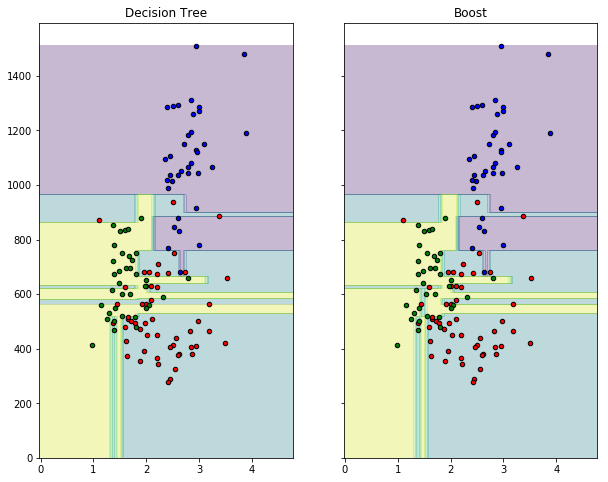

In [28]:
x_min, x_max = X_train[:].min()[0] - 1, X_train[:].max()[0] + 1
y_min, y_max = X_train[:].min()[0] - 1, X_train[:].max()[1] + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
np.arange(y_min, y_max, 0.1))

f, axarr = plt.subplots(nrows=1, ncols=2, sharex='col', sharey='row', figsize=(10, 8))

for idx, clf, tt in zip([0, 1],
[dtree, boost],
['Decision Tree', 'Boost']):

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    axarr[idx].contourf(xx, yy, Z, alpha=0.3)
    axarr[idx].scatter(X_train[y_train==1]['Total phenols'], X_train[y_train==1]['Proline'], c='blue', s=20, edgecolor='black')
    axarr[idx].scatter(X_train[y_train==2]['Total phenols'], X_train[y_train==2]['Proline'], c='red',s=20, edgecolor='black')
    axarr[idx].scatter(X_train[y_train==3]['Total phenols'], X_train[y_train==3]['Proline'], c='green', s=20, edgecolor='black')
    axarr[idx].set_title(tt)

plt.show()